In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv('/content/eda_manipulate_date_strings_with_python.csv')

In [16]:
df.head()

,date,number_of_strikes,center_point_geom
0,2016-08-05,16,POINT(-101.5 24.7)
1,2016-08-05,16,POINT(-85 34.3)
2,2016-08-05,16,POINT(-89 41.4)
3,2016-08-05,16,POINT(-89.8 30.7)
4,2016-08-05,16,POINT(-86.2 37.9)


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10479003 entries, 0 to 10479002
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   date               object
 1   number_of_strikes  int64 
 2   center_point_geom  object
dtypes: int64(1), object(2)
memory usage: 239.8+ MB


In [18]:
df['date']=pd.to_datetime(df['date'])

In [19]:
df['date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10479003 entries, 0 to 10479002
Series name: date
Non-Null Count     Dtype         
--------------     -----         
10479003 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 79.9 MB


In [25]:
# lets create four more columns with Year-Week, Year-Month, Year-Quarters and Year.
df['week'] = df['date'].dt.strftime('%Y-W%V')

In [29]:
df['month'] = df['date'].dt.strftime('%Y-%m')

In [30]:
df['year'] = df['date'].dt.strftime('%Y')

In [33]:
df['quarter'] = df['date'].dt.to_period('Q').dt.strftime('%Y-Q%q')
print()
print('this one is different than the rest coz dt has pre-made code for dividing into quarters.')


this one is different than the rest coz dt has pre-made code for dividing into quarters.


In [34]:
df.head()

,date,number_of_strikes,center_point_geom,week,month,year,quarter
0,2016-08-05,16,POINT(-101.5 24.7),2016-W31,2016-08,2016,2016-Q3
1,2016-08-05,16,POINT(-85 34.3),2016-W31,2016-08,2016,2016-Q3
2,2016-08-05,16,POINT(-89 41.4),2016-W31,2016-08,2016,2016-Q3
3,2016-08-05,16,POINT(-89.8 30.7),2016-W31,2016-08,2016,2016-Q3
4,2016-08-05,16,POINT(-86.2 37.9),2016-W31,2016-08,2016,2016-Q3


In [46]:
df.shape

(10479003, 7)

In [40]:
# lets create a dataframe for lightning strikes by weeks in 2018
df_by_week_2018 = df[df['year'] == '2018'].groupby(['week']).sum('numeric_only=True').reset_index()


In [41]:
df_by_week_2018.head()

,week,number_of_strikes
0,2018-W01,34843
1,2018-W02,353425
2,2018-W03,37132
3,2018-W04,412772
4,2018-W05,34972


In [47]:
df_by_week_2018.shape

(52, 2)


this is very clustered


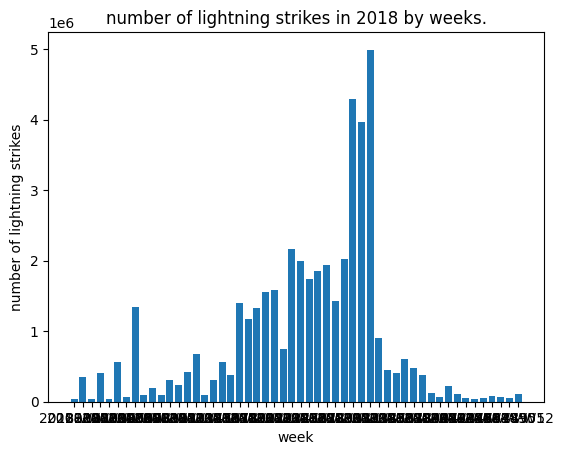

In [54]:
# lets plot the lightning strikes by weeks in year 2018.
# focus on the barplot how the differences are made

plt.bar(x=df_by_week_2018['week'], height=df_by_week_2018['number_of_strikes'])

plt.xlabel('week')
plt.ylabel('number of lightning strikes')
plt.title('number of lightning strikes in 2018 by weeks.')

print()
print('this is very clustered')


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51],
 [Text(0, 0, '2018-W01'),
  Text(1, 0, '2018-W02'),
  Text(2, 0, '2018-W03'),
  Text(3, 0, '2018-W04'),
  Text(4, 0, '2018-W05'),
  Text(5, 0, '2018-W06'),
  Text(6, 0, '2018-W07'),
  Text(7, 0, '2018-W08'),
  Text(8, 0, '2018-W09'),
  Text(9, 0, '2018-W10'),
  Text(10, 0, '2018-W11'),
  Text(11, 0, '2018-W12'),
  Text(12, 0, '2018-W13'),
  Text(13, 0, '2018-W14'),
  Text(14, 0, '2018-W15'),
  Text(15, 0, '2018-W16'),
  Text(16, 0, '2018-W17'),
  Text(17, 0, '2018-W18'),
  Text(18, 0, '2018-W19'),
  Text(19, 0, '2018-W20'),
  Text(20, 0, '2018-W21'),
  Text(21, 0, '2018-W22'),
  Text(22, 0, '2018-W23'),
  Text(23, 0, '2018-W24'),
  Text(24, 0, '2018-W25'),
  Text(25, 0, '2018-W26'),
  Tex

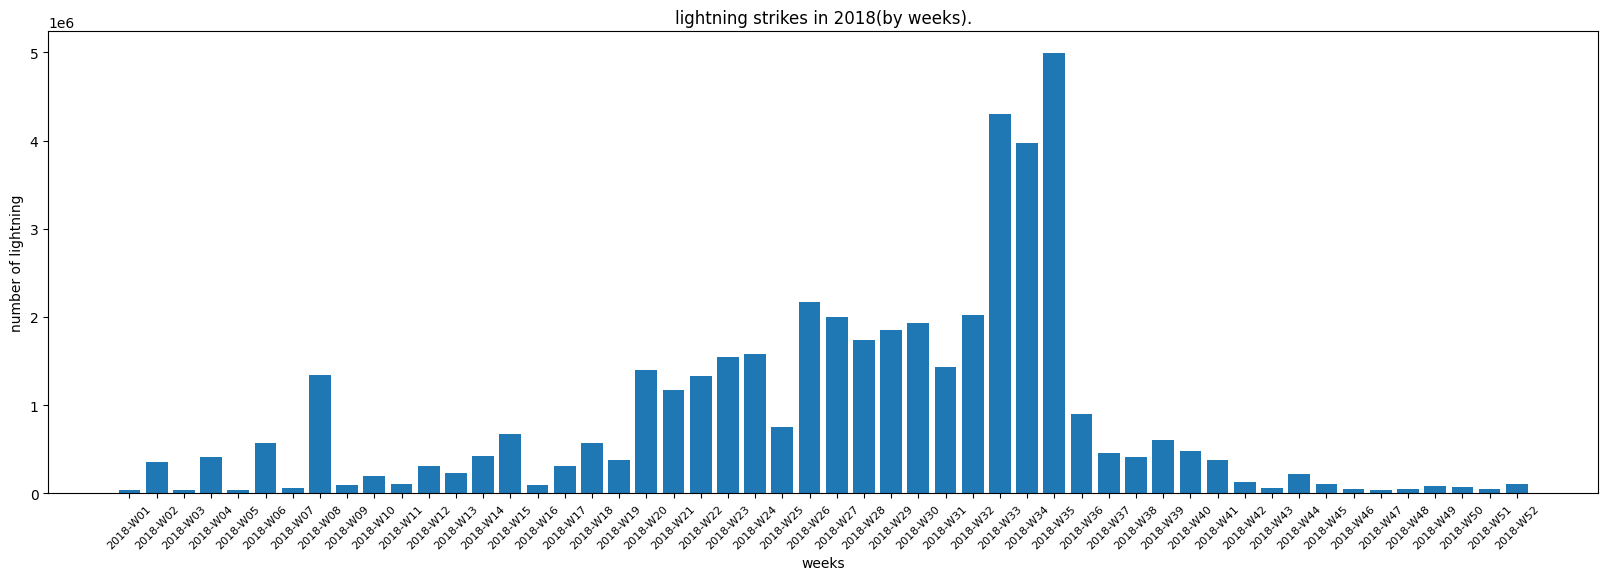

In [61]:
plt.figure(figsize = (20, 6))

plt.bar(x=df_by_week_2018['week'], height=df_by_week_2018['number_of_strikes'])

plt.title('lightning strikes in 2018(by weeks).')
plt.xlabel('weeks')
plt.ylabel('number of lightning')

plt.xticks(rotation=45, fontsize=8)



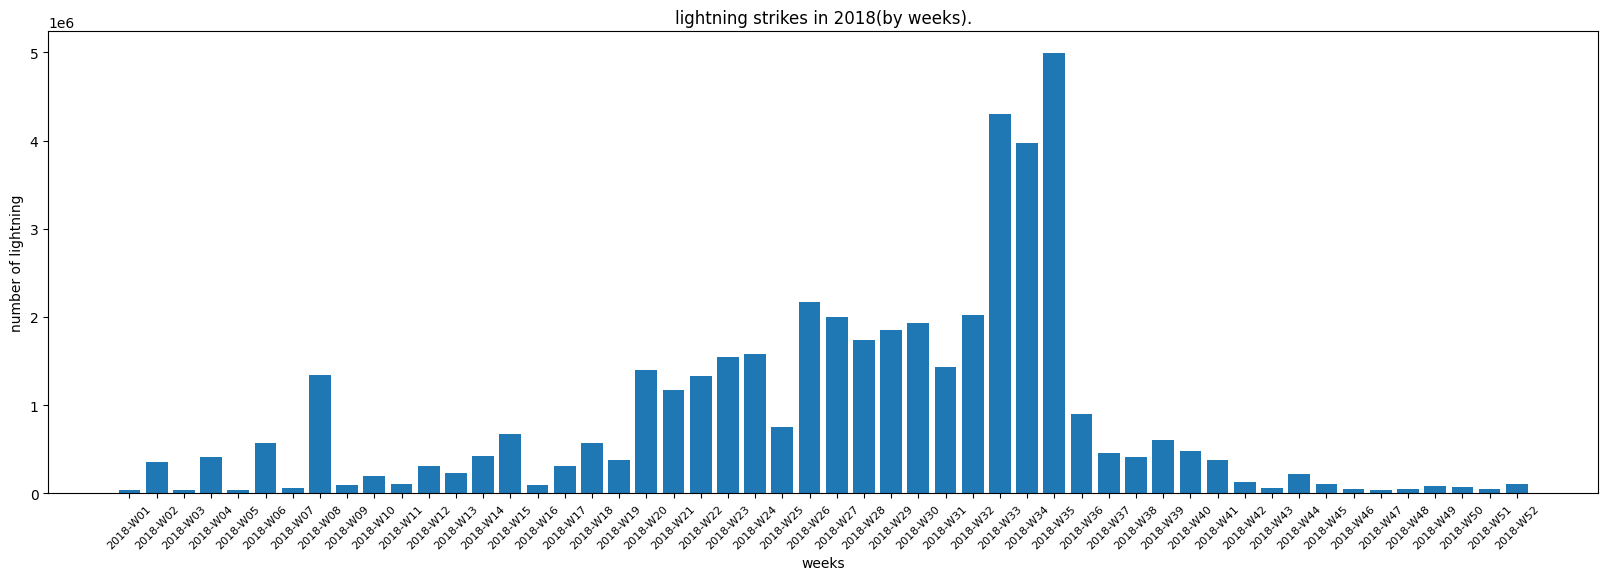

In [64]:
# why plt.show() is important
# plt.figure(), plt.xticks(), plt.show() makes a graph cleaner and more readable.


plt.figure(figsize = (20, 6))

plt.bar(x=df_by_week_2018['week'], height=df_by_week_2018['number_of_strikes'])

plt.title('lightning strikes in 2018(by weeks).')
plt.xlabel('weeks')
plt.ylabel('number of lightning')

plt.xticks(rotation=45, fontsize=8)

plt.show()

In [70]:
# lets plot the lightning strikes by quarters.
# lets work on million since its easier to work with
# this is just for 2016

df_2016_by_quarter = df[df['year'] == '2016'].groupby(['quarter']).sum('numeric_only=True').reset_index()
df_2016_by_quarter.head()

,quarter,number_of_strikes
0,2016-Q1,2683798
1,2016-Q2,15084857
2,2016-Q3,21843820
3,2016-Q4,1969754


In [69]:
df_2016_by_quarter['number_of_strikes_formatted'] = df_2016_by_quarter['number_of_strikes'].div(1000000).round(1).astype(str)+'M'
df_2016_by_quarter.head()

,quarter,number_of_strikes,number_of_strikes_formatted
0,2016-Q1,2683798,2.7M
1,2016-Q2,15084857,15.1M
2,2016-Q3,21843820,21.8M
3,2016-Q4,1969754,2.0M


In [71]:
# this is for whole dataset (df)
df_by_quarters = df.groupby(['quarter']).sum('numeric_only=True').reset_index()

In [72]:
df_by_quarters

,quarter,number_of_strikes
0,2016-Q1,2683798
1,2016-Q2,15084857
2,2016-Q3,21843820
3,2016-Q4,1969754
4,2017-Q1,2444279
5,2017-Q2,13548585
6,2017-Q3,17277461
7,2017-Q4,1824870
8,2018-Q1,3785528
9,2018-Q2,12136148


In [76]:
df_by_quarters['number_of_strikes_formatted'] = df_by_quarters['number_of_strikes'].div(1000000).round(1).astype(str)+'M'
df_by_quarters

,quarter,number_of_strikes,number_of_strikes_formatted
0,2016-Q1,2683798,2.7M
1,2016-Q2,15084857,15.1M
2,2016-Q3,21843820,21.8M
3,2016-Q4,1969754,2.0M
4,2017-Q1,2444279,2.4M
5,2017-Q2,13548585,13.5M
6,2017-Q3,17277461,17.3M
7,2017-Q4,1824870,1.8M
8,2018-Q1,3785528,3.8M
9,2018-Q2,12136148,12.1M


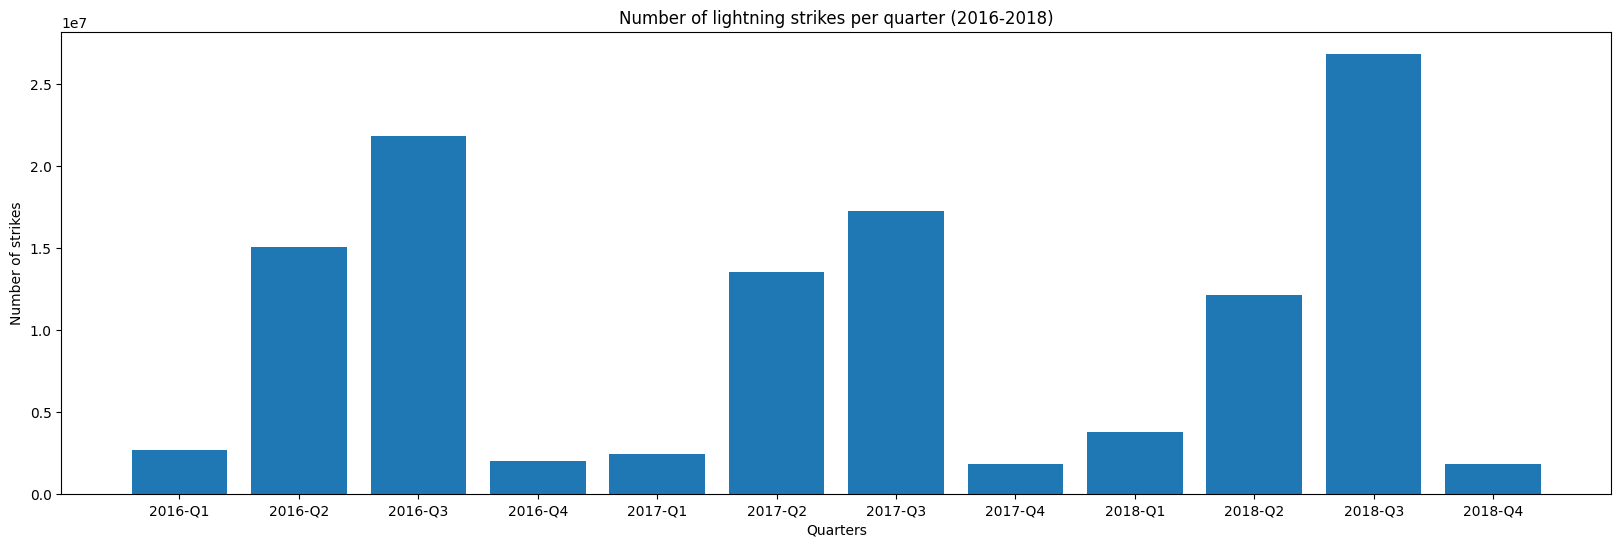

In [85]:
# lets plot the bar graph
plt.figure(figsize=(20,6))

plt.bar(x=df_by_quarters['quarter'], height=df_by_quarters['number_of_strikes'])

plt.xlabel('Quarters')
plt.ylabel('Number of strikes')
plt.title('Number of lightning strikes per quarter (2016-2018)')



plt.show()

In [86]:
def addlabels(x,y,labels):
  for i in range(len(x)):
    plt.text(i, y[i], labels[i], ha='center', va='bottom')

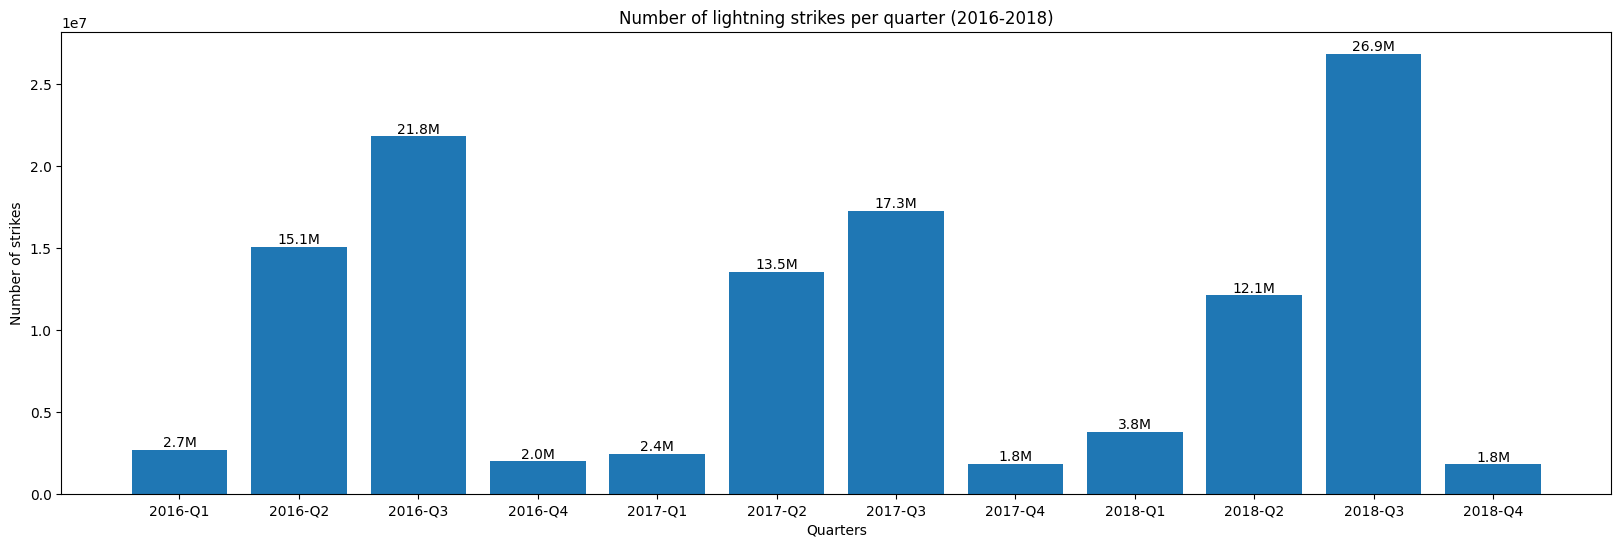

In [87]:
plt.figure(figsize=(20,6))

plt.bar(x=df_by_quarters['quarter'], height=df_by_quarters['number_of_strikes'])
addlabels(df_by_quarters['quarter'], df_by_quarters['number_of_strikes'], df_by_quarters['number_of_strikes_formatted'])

plt.xlabel('Quarters')
plt.ylabel('Number of strikes')
plt.title('Number of lightning strikes per quarter (2016-2018)')


plt.show()